In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import sys
import seaborn

seaborn.set()
seaborn.set_style("ticks")
seaborn.set_context("poster")
from matplotlib import pyplot

In [62]:
def print_accuracy(title, data, stds, marker_styles, curve_colors,
                   curve_styles, curve_labels, leg_title, rand_base, leg_loc, leg_flag, name):
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.title(title , fontsize=25)
    plt.xlabel(r'Model Size Factor', fontsize=25)
    plt.ylabel(r'log$_{10}$(#Parameters)', fontsize=25)
    plt.xlim((0.245, 4.07))
    plt.ylim((-0.1, 10))
    plt.grid(True, which='both')
    plt.xscale('log')
    plt.xticks(size_factors, size_labels)
    plt.yticks([0, 5, 10])

    for curve_idx in range(np.shape(data)[0]):
        non_0_idx = (data[curve_idx] != 0)
        plt.plot(size_factors[non_0_idx], data[curve_idx][non_0_idx], marker=marker_styles[curve_idx], color=curve_colors[curve_idx],
                 linestyle=curve_styles[curve_idx], linewidth=3, markersize=7)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
        
    if leg_flag:
        leg = plt.legend(curve_labels, loc=leg_loc, framealpha=0.8, fontsize=12, title=leg_title)
        leg.get_title().set_fontsize('12')
    plt.rc('xtick',labelsize=8)

    plt.show()
    fig.savefig(name+".pdf",format='pdf', bbox_inches='tight',dpi=1000)

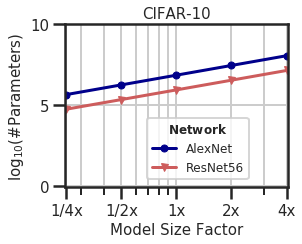

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10


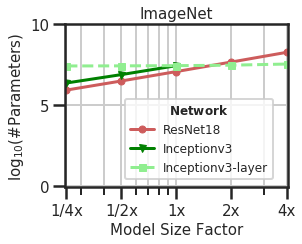

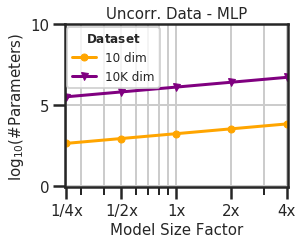

In [66]:
#Base CIFAR

sys.path.append('../')
import experiments


curves = 2
curve_labels_mlp = ['10 dim', '10K dim']
curve_colors_mlp = ['orange', 'purple']

curve_labels = ['AlexNet', 'ResNet56']
curve_labels_im = ['ResNet18', 'Inceptionv3', 'Inceptionv3-layer']

curve_colors = ['darkblue', 'indianred']
curve_colors_im = ['indianred', 'green', 'lightgreen']

curve_styles = ['-', '-', '--']
marker_styles =['o', 'v', 's']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
seeds = 2

results = np.zeros((2, sizes))
results_im = np.zeros((3, sizes))

results_mlp = np.zeros((2, sizes))

results[0,:] = [438746, 1749930,  6989642, 27938442, 111713546]
results[1,:] = [54518, 215362, 856058, 3413482, 13632458]
results_im[0,:] = [831513, 3057225, 11694249, 45710697, 180713193]
results_im[1,:] = [2286026, 7571266, 27145970, 0, 0]
results_im[2,:] = [25993598, 26350842, 27145970, 29058786, 34174658]

results_mlp[0,:] = [418, 834,  1666, 3330, 6658]
results_mlp[1,:] = [320098, 640194, 1280386, 2560770, 5121538]

leg_loc = (0.37, 0.05)
print_accuracy(r'CIFAR-10', np.log10(results), 0*results, marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Network}$", 10, leg_loc, True,
              "param_cifar")
leg_loc = (0.27, 0.05)

print_accuracy(r'ImageNet', np.log10(results_im), 0*results_im ,  marker_styles,
               curve_colors_im, curve_styles, curve_labels_im, r"$\bf{Network}$", 10, leg_loc, True, 
              "param_imagenet")

leg_loc = (0.01, 0.61)

print_accuracy(r'Uncorr. Data - MLP', np.log10(results_mlp), 0*results_im ,  marker_styles,
               curve_colors_mlp, curve_styles, curve_labels_mlp, r"$\bf{Dataset}$", 10, leg_loc, True, 
              "param_synthetic")



In [22]:
np.log(results)

array([[12.99167594, 14.37508635, 15.7599399 , 17.14551415, 18.53144853],
       [10.9062862 , 12.28007561, 13.66009341, 15.04324344, 16.42796412]])